In [ ]:
#Install Biopython
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.3 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO  # For fetching and parsing biological sequence data from NCBI and FASTA/GenBank files
import pandas as pd            # For loading, manipulating, and analyzing structured data
import numpy as np             # For numerical operations (arrays, statistics, etc.)
from collections import Counter  # For counting hashable objects like nucleotides or k-mers
import matplotlib.pyplot as plt   # For creating static plots and charts
import seaborn as sns             # For enhanced data visualization (heatmaps, color themes, etc.)
from flask import Flask, send_file  # For creating a simple web app and serving files
from google.colab import files      # For uploading/downloading files in Google Colab


## 1. Extratcing sequences from genbank

In [ ]:
Entrez.email = 'ziyard.20210326@iit.ac.lk'

# List of accession numbers
accession_numbers = {
    #japan
     "japan" : ["AP008249.1", "AP008250.1", "AP008251.1", "AP008252.1", "AP008253.1", "AP008254.1", "AP008255.1", "AP008256.1", "AP008257.1", "AP008258.1", "AP008259.1", "AP008260.1", "AP008261.1", "AP008262.1", "AP008263.1", "AP008264.1", "AP008265.1", "AP008266.1", "AP008267.1", "AP008268.1", "AP008269.1", "AP008270.1", "AP008271.1", "AP008272.1", "AP008273.1", "AP008274.1", "AP008275.1", "AP008276.1", "AP008277.1", "AP008278.1", "AP008279.1", "AP008280.1", "AP008281.1", "AP008282.1", "AP008283.1", "AP008284.1", "AP008285.1", "AP008286.1", "AP008287.1", "AP008288.1", "AP008289.1", "AP008290.1", "AP008291.1", "AP008292.1", "AP008293.1", "AP008294.1", "AP008295.1", "AP008296.1", "AP008297.1", "AP008298.1",],
    #india
    "india" : ["MH444368.1", "MH444369.1", "MH444370.1", "MH444371.1", "MH444372.1", "MH444373.1", "MH444374.1", "MH444375.1", "MH444376.1", "MH444377.1", "MH444378.1", "MH444379.1", "MH444380.1", "MH444381.1", "MH444382.1", "MH444383.1", "MH444384.1", "MH444385.1", "MH444386.1", "MH444387.1", "MH444388.1", "MH444389.1", "MH444390.1", "MH444391.1", "MH444392.1", "MH444393.1", "MH444394.1", "MH444395.1", "MH444396.1", "MH444397.1", "MH444398.1", "MH444399.1", "MH444400.1", "MH444401.1", "MH444402.1", "MH444403.1", "MH444404.1", "MH444405.1", "MH444406.1", "MH444407.1", "MH444408.1", "MH444409.1", "MH444410.1", "MH444411.1", "MH444412.1", "MH444413.1", "MH444414.1", "MH444415.1", "MH444416.1", "MH444417.1" ,],
    #russia
     "russia" : ["EF153771.1", "EF153772.1", "EF153773.1", "EF153774.1", "EF153775.1", "EF153776.1", "EF153777.1", "EF153778.1", "EF153779.1", "EF153780.1", "EF153781.1", "EF153782.1", "EF153783.1", "EF153784.1", "EF153785.1", "EF153786.1", "EF153787.1", "EF153788.1", "EF153789.1", "EF153790.1", "EF153791.1", "EF153792.1", "EF153793.1", "EF153794.1", "EF153795.1", "EF153796.1", "EF153797.1", "EF153798.1", "EF153799.1", "EF153800.1", "EF153801.1", "EF153802.1", "EF153803.1", "EF153804.1", "EF153805.1", "EF153806.1", "EF153807.1", "EF153808.1", "EF153809.1", "EF153810.1", "EF153811.1", "EF153812.1", "EF153813.1", "EF153814.1", "EF153815.1", "EF153816.1", "EF153817.1", "EF153818.1", "EF153819.1", "EF153820.1",],
    #spain
     "spain" : ["JX297126.1", "JX297127.1", "JX297128.1", "JX297129.1", "JX297130.1", "JX297131.1", "JX297132.1", "JX297133.1", "JX297134.1", "JX297135.1", "JX297136.1", "JX297137.1", "JX297138.1", "JX297139.1", "JX297140.1", "JX297141.1", "JX297142.1", "JX297143.1", "JX297144.1", "JX297145.1", "JX297146.1", "JX297147.1", "JX297148.1", "JX297149.1", "JX297150.1", "JX297151.1", "JX297152.1", "JX297153.1", "JX297154.1", "JX297155.1", "JX297156.1", "JX297157.1", "JX297158.1", "JX297159.1", "JX297160.1", "JX297161.1", "JX297162.1", "JX297163.1", "JX297164.1", "JX297165.1", "JX297166.1", "JX297167.1", "JX297168.1", "JX297169.1", "JX297170.1", "JX297171.1", "JX297172.1", "JX297173.1", "JX297174.1", "JX297175.1",],
    #kenya (1-1121 bases)
     "kenya" :  ["AY632902.1", "AY632903.1", "AY632904.1", "AY632905.1", "AY632906.1", "AY632907.1", "AY632908.1", "AY632909.1", "AY632910.1", "AY632911.1", "AY632912.1", "AY632913.1", "AY632914.1", "AY632915.1", "AY632916.1", "AY632917.1", "AY632918.1", "AY632919.1", "AY632920.1", "AY632921.1", "AY632922.1", "AY632923.1", "AY632924.1", "AY632925.1", "AY632926.1", "AY632927.1", "AY632928.1", "AY632929.1", "AY632930.1", "AY632931.1", "AY632932.1", "AY632933.1", "AY632934.1", "AY632935.1", "AY632936.1", "AY632937.1", "AY632938.1", "AY632939.1", "AY632940.1", "AY632941.1", "AY632942.1", "AY632943.1", "AY632944.1", "AY632945.1", "AY632946.1", "AY632947.1", "AY632948.1", "AY632949.1", "AY632950.1", "AY632951.1",],
    #Burkina Faso (142 to 1226 bases)
    "burkina" : [ "MH123290.1", "MH123300.1", "MH123302.1", "MH123308.1", "MH123310.1", "MH123322.1", "MH123332.1" ],
    #Burkina Faso (143 to 1227 bases)
    "burkinaFaso" : [ "MH123287.1", "MH123288.1", "MH123289.1", "MH123291.1", "MH123292.1", "MH123293.1", "MH123294.1", "MH123295.1", "MH123296.1", "MH123297.1", "MH123298.1", "MH123299.1", "MH123301.1", "MH123303.1", "MH123304.1","MH123305.1", "MH123306.1", "MH123307.1", "MH123309.1", "MH123311.1", "MH123312.1", "MH123313.1", "MH123314.1", "MH123315.1", "MH123316.1","MH123317.1", "MH123318.1", "MH123319.1", "MH123320.1", "MH123321.1","MH123323.1", "MH123324.1", "MH123325.1", "MH123326.1", "MH123327.1","MH123328.1", "MH123329.1", "MH123330.1", "MH123331.1", "MH123333.1", "MH123334.1", "MH123335.1", "MH123336.1"]
}



# Initialize an empty list to hold the sequences
hvr_data = []
geo_loc_counts = {}  # keep track of occurrences for each country
# ethnicity_counts = {"asia": 0, "caucasian": 0, "africa": 0}  # To keep track of ethnicity occurrences

# Define ethnicities based on countries
ethnicity_map = {
    "japan": "asian",
    "india": "asian",
    "russia": "caucasian",
    "spain": "caucasian",
    "kenya": "african",
    "burkina": "african",
    "burkinaFaso": "african"
}

# Initialize counters for Burkina and Burkina Faso
geo_loc_counts = {"burkina": 0}  # Only track "burkina" count here
burkina_faso_count = 0  # Separate counter for Burkina Faso

# Loop through each accession number
sample_counter = 1  # Initialize a continuous sample counter

for country, accession_numbers in accession_numbers.items():
    if country not in geo_loc_counts:
        geo_loc_counts[country] = 0  # Initialize the counter for the country

    for acc in accession_numbers:
        try:
            # Fetch the GenBank record
            handle = Entrez.efetch(db="nucleotide", id=acc, rettype="gb", retmode="text")
            record = SeqIO.read(handle, "genbank")
            handle.close()

            # Define the indices for HVR1 and HVR2
            if country in ["japan", "india", "russia", "spain"]:
                hvr1_start, hvr1_end = 16024, 16365
                hvr2_start, hvr2_end = 73, 340
            elif country in ["kenya"]:
                hvr1_start, hvr1_end = 1, 342
                hvr2_start, hvr2_end = 618, 885
            elif country in ["burkina"]:
                hvr1_start, hvr1_end = 142, 483
                hvr2_start, hvr2_end = 760, 1027
            elif country in ["burkinaFaso"]:
                hvr1_start, hvr1_end = 143, 484
                hvr2_start, hvr2_end = 761, 1028

            # Extract the HVR sequences
            hvr1_sequence = str(record.seq[hvr1_start:hvr1_end])
            hvr2_sequence = str(record.seq[hvr2_start:hvr2_end])

            # Calculate the lengths of HVR1, HVR2, and the concatenated sequence
            hvr1_length = len(hvr1_sequence)
            hvr2_length = len(hvr2_sequence)
            concatenated_length = hvr1_length + hvr2_length

            # Update geo_loc with the current count for the country
            if country == "burkina":
                geo_loc_counts["burkina"] += 1  # Increment the counter for Burkina
                geo_loc = f"burkina{geo_loc_counts['burkina']}"  # Create geo_loc for Burkina


            # Update geo_loc for Burkina Faso
            elif country == "burkinaFaso":
                burkina_faso_count += 1  # Increment the counter for Burkina Faso
                geo_loc = f"burkina{geo_loc_counts['burkina'] + burkina_faso_count}"  # Continue from Burkina count

            # if country in ["burkina", "burkinaFaso"]:
            #     geo_loc = "burkina"

            else:
                geo_loc_counts[country] += 1  # Increment the counter for other countries
                geo_loc = f"{country}{geo_loc_counts[country]}"  # Create geo_loc string
                # geo_loc = country

            # Update ethnicity based on the group
            if country in ["japan", "india"]:
                ethnicity = f"asian"
            elif country in ["russia", "spain"]:
                ethnicity = f"caucasian"
            elif country in ["kenya", "burkina", "burkinaFaso"]:
                ethnicity = f"african"
            else:
                ethnicity = "unknown"  # Fallback in case of an unrecognized country

            # Append the data to the list with lengths
            hvr_data.append({
                "sample": f"sample{sample_counter}",  # Continuous sample number
                "accession": acc,
                "HVR1": hvr1_sequence,
                "HVR2": hvr2_sequence,
                "HVR1_length": hvr1_length,
                "HVR2_length": hvr2_length,
                "concatenated_length": concatenated_length,
                "geo_loc": geo_loc,
                "ethnicity": ethnicity
            })

            # Increment the sample counter
            sample_counter += 1

        except Exception as e:
            print(f"Error processing {acc}: {e}")

In [ ]:
#4
# Save the sequences to a CSV file
df = pd.DataFrame(hvr_data)
output_file = 'hvr_sequences.csv'
df.to_csv(output_file, index=False)

NameError: name 'pd' is not defined

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
#Load Dataset
df = pd.read_csv('hvr_sequences.csv')

# 2. Converting all non-standard bases to N

EXPLORING THE DATASET
1. Basic Dataset Information:
--------------------------------------------------
Total number of sequences: 300

Dataset columns: ['sample', 'accession', 'HVR1', 'HVR2', 'HVR1_length', 'HVR2_length', 'concatenated_length', 'geo_loc', 'ethnicity']

Missing values:
sample                 0
accession              0
HVR1                   0
HVR2                   0
HVR1_length            0
HVR2_length            0
concatenated_length    0
geo_loc                0
ethnicity              0
dtype: int64

2. Sequence Length Analysis:
--------------------------------------------------
Minimum HVR1 length: 341
Maximum HVR1 length: 341
Mean HVR1 length: 341.00
Minimum HVR2 length: 267
Maximum HVR2 length: 267
Mean HVR2 length: 267.00
Minimum concatenated length: 608
Maximum concatenated length: 608
Mean concatenated length: 608.00

4. Ethnicity Distribution:
--------------------------------------------------
ethnicity
asian        100
caucasian    100
african      100
Name: 

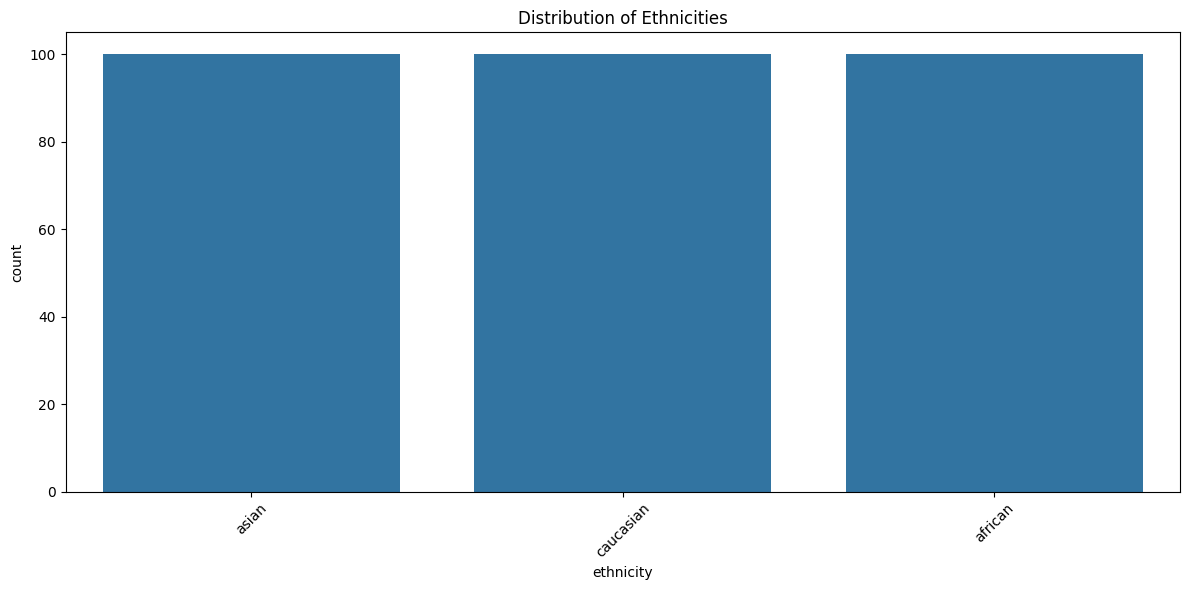


ANALYZING NON-STANDARD BASES

Non-Standard Base Analysis:
--------------------------------------------------
Row 132 contains non-standard bases: R | Percentage: 0.1645%
Row 173 contains non-standard bases: Y | Percentage: 0.1645%
Row 177 contains non-standard bases: Y | Percentage: 0.1645%
Row 232 contains non-standard bases: N | Percentage: 0.1645%

Non-standard base frequencies:
Base: R | Count: 1 | Frequency: 0.0005%
Base: Y | Count: 2 | Frequency: 0.0011%
Base: N | Count: 1 | Frequency: 0.0005%

Total Non-Standard Base Percentage:
Total Non-Standard Base Percentage: 0.0022%

Sample sequences BEFORE replacement:
Row 132, HVR1: TTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGTCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCTCCTCATGCTTACAAGCAAGTACAGCAATCAACCTTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTATCCACCCTTAACAGTACATAGTACATAAAACCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGCCCCCA
Row 132, HVR2: TGC

In [ ]:
def explore_sequence_data(df):
    """
    Explore and analyze genomic sequence data.
    """
    print("1. Basic Dataset Information:")
    print("-" * 50)
    print(f"Total number of sequences: {len(df)}")
    print("\nDataset columns:", df.columns.tolist())
    print("\nMissing values:")
    print(df.isnull().sum())

    # Sequence columns
    sequence_cols = ['HVR1', 'HVR2']

    print("\n2. Sequence Length Analysis:")
    print("-" * 50)
    print(f"Minimum HVR1 length: {df['HVR1_length'].min()}")
    print(f"Maximum HVR1 length: {df['HVR1_length'].max()}")
    print(f"Mean HVR1 length: {df['HVR1_length'].mean():.2f}")
    print(f"Minimum HVR2 length: {df['HVR2_length'].min()}")
    print(f"Maximum HVR2 length: {df['HVR2_length'].max()}")
    print(f"Mean HVR2 length: {df['HVR2_length'].mean():.2f}")
    print(f"Minimum concatenated length: {df['concatenated_length'].min()}")
    print(f"Maximum concatenated length: {df['concatenated_length'].max()}")
    print(f"Mean concatenated length: {df['concatenated_length'].mean():.2f}")

    #Ethnicity distribution
    print("\n4. Ethnicity Distribution:")
    print("-" * 50)
    print(df['ethnicity'].value_counts())

    # Plot ethnicity distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='ethnicity')
    plt.xticks(rotation=45)
    plt.title('Distribution of Ethnicities')
    plt.tight_layout()
    plt.show()

def analyze_non_standard_bases(df):
    """
    Analyze and process non-standard bases in both HVR1 and HVR2 sequence data.
    Returns a DataFrame with non-standard bases replaced with 'N' if below threshold.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Sequence columns
    sequence_cols = ['HVR1', 'HVR2']

    # Find unique bases in the dataset for both HVR1 and HVR2
    all_bases = "".join(df_cleaned[sequence_cols].dropna().apply(lambda row: ''.join(row), axis=1))
    base_counts = Counter(all_bases)

    # Identify non-standard bases (excluding A, T, C, G)
    non_standard_bases = {base: count for base, count in base_counts.items() if base not in "ATCG"}

    if not non_standard_bases:
        print("No non-standard bases found.")
        return df_cleaned

    # Calculate total bases
    total_bases = sum(base_counts.values())

    print("\nNon-Standard Base Analysis:")
    print("-" * 50)

    # Store row details with non-standard bases
    non_standard_base_details = {}

    # Step 1: Show rows with non-standard bases and their percentages
    for idx, row in df_cleaned.iterrows():
        non_standard_bases_in_row = []
        row_base_count = 0  # To calculate total base count for the row

        for col in sequence_cols:
            sequence = row[col]
            if pd.notna(sequence):  # Check if the sequence is not NaN
                for base in non_standard_bases:
                    if base in sequence:
                        non_standard_bases_in_row.append(base)
                        row_base_count += sequence.count(base)

        if non_standard_bases_in_row:
            # Calculate total bases in the row (accounting for NaN values)
            row_sequences = [row[col] for col in sequence_cols if pd.notna(row[col])]
            row_total_bases = sum(len(seq) for seq in row_sequences)

            if row_total_bases > 0:  # Avoid division by zero
                row_percentage = (row_base_count / row_total_bases) * 100  # Row's non-standard base percentage
                non_standard_base_details[idx] = (non_standard_bases_in_row, row_percentage)

                # Print row info with non-standard bases and their percentage
                print(f"Row {idx} contains non-standard bases: {', '.join(non_standard_bases_in_row)} | Percentage: {row_percentage:.4f}%")

    # Step 2: Show non-standard base frequencies
    print("\nNon-standard base frequencies:")
    total_non_standard_percentage = 0
    for base, count in non_standard_bases.items():
        freq = (count / total_bases) * 100
        print(f"Base: {base} | Count: {count} | Frequency: {freq:.4f}%")
        total_non_standard_percentage += freq

    # Step 3: Show total non-standard base percentage
    print("\nTotal Non-Standard Base Percentage:")
    print(f"Total Non-Standard Base Percentage: {total_non_standard_percentage:.4f}%")

    # Step 4: Threshold check (1% threshold)
    threshold = 1.0  # 1% threshold

    # Print sample sequences before replacement for verification
    print("\nSample sequences BEFORE replacement:")
    sample_indices = [idx for idx in non_standard_base_details.keys()][:5]  # Get up to 5 samples
    for idx in sample_indices:
        for col in sequence_cols:
            if idx < len(df_cleaned) and pd.notna(df_cleaned.loc[idx, col]):
                print(f"Row {idx}, {col}: {df_cleaned.loc[idx, col]}")

    if total_non_standard_percentage < threshold:
        print(f"\nTotal non-standard base percentage ({total_non_standard_percentage:.4f}%) is below the threshold of {threshold}%.")
        print("Replacing non-standard bases with 'N'...")

        # Replace non-standard bases with 'N' in both HVR1 and HVR2
        replacement_count = 0
        for base in non_standard_bases:
            for col in sequence_cols:
                # Count occurrences before replacement
                before_count = df_cleaned[col].str.count(base).sum()

                # Perform the replacement
                df_cleaned[col] = df_cleaned[col].str.replace(base, 'N', regex=False)

                # Count occurrences after replacement
                after_count = df_cleaned[col].str.count('N').sum() - (df_cleaned[col].str.count('N').sum() - before_count)

                replacement_count += before_count
                print(f"Replaced {before_count} occurrences of '{base}' with 'N' in {col}")

        print(f"Total replacements made: {replacement_count}")

        # Print sample sequences after replacement for verification
        print("\nSample sequences AFTER replacement:")
        for idx in sample_indices:
            for col in sequence_cols:
                if idx < len(df_cleaned) and pd.notna(df_cleaned.loc[idx, col]):
                    print(f"Row {idx}, {col}: {df_cleaned.loc[idx, col]}")

    else:
        print(f"\nTotal non-standard base percentage ({total_non_standard_percentage:.4f}%) is above the threshold of {threshold}%.")
        print("Creating features for non-standard bases instead of replacing them.")

        # Create a binary feature for each non-standard base
        for base in non_standard_bases:
            for col in sequence_cols:
                df_cleaned[f"contains_{base}_{col}"] = df_cleaned[col].apply(lambda x: 1 if pd.notna(x) and base in x else 0)
                print(f"Created feature 'contains_{base}_{col}'")

    return df_cleaned


# Load the data (assuming df is defined here)
# df = pd.read_csv('your_sequence_data.csv')  # Uncomment and replace with your file

# Explore the data
print("EXPLORING THE DATASET")
print("=" * 50)
explore_sequence_data(df)

# Analyze and replace non-standard bases
print("\nANALYZING NON-STANDARD BASES")
print("=" * 50)
cleaned_data = analyze_non_standard_bases(df)

# Verify replacements by checking if any non-standard bases remain
sequence_cols = ['HVR1', 'HVR2']
all_cleaned_bases = "".join(cleaned_data[sequence_cols].dropna().apply(lambda row: ''.join(row), axis=1))
remaining_non_standard = set(all_cleaned_bases) - set("ATCGN")

if not remaining_non_standard:
    print("\nVerification successful: All non-standard bases were properly replaced with 'N'")
else:
    print(f"\nWarning: Some non-standard bases remain: {remaining_non_standard}")

# Save cleaned data
cleaned_data.to_csv('cleaned_hvr1_hvr2_ethnicity.csv', index=False)
print("\nCleaned data saved to 'cleaned_hvr1_hvr2_ethnicity.csv'")

## 2.1 creating the datasets as needed depending on the regions

In [ ]:
# Create the three copies as specified
df_hvr1_ethnicity = cleaned_data[['HVR1', 'ethnicity', 'geo_loc']]
df_hvr2_ethnicity = cleaned_data[['HVR2', 'ethnicity', 'geo_loc']]
df_hvr1_hvr2_ethnicity = cleaned_data[['HVR1', 'HVR2', 'ethnicity', 'geo_loc']]

# Save the datasets as CSV files
df_hvr1_ethnicity.to_csv('hvr1_ethnicity.csv', index=False)
df_hvr2_ethnicity.to_csv('hvr2_ethnicity.csv', index=False)
df_hvr1_hvr2_ethnicity.to_csv('hvr1_hvr2_ethnicity.csv', index=False)

print("CSV files saved successfully!")

CSV files saved successfully!


In [ ]:
df_hvr1_ethnicity

,HVR1,ethnicity,geo_loc
0,TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTC...,asian,japan1
1,TTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCC...,asian,japan2
2,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,asian,japan3
3,TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTC...,asian,japan4
4,CTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCAC...,asian,japan5
...,...,...,...
295,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,african,burkina46
296,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,african,burkina47
297,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,african,burkina48
298,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,african,burkina49


# 3. HVR1 Sequence file alignment and cleaning

3.1. uploading the file before aligning

In [ ]:
#Load Dataset
df = pd.read_csv('hvr1_ethnicity.csv')

3.2. converting it to a fasta file

In [ ]:
def convert_to_fasta(input_file, output_file):
    # Load dataset
    df = pd.read_csv(input_file)  # Assuming CSV input

    with open(output_file, 'w') as fasta_file:
        for index, row in df.iterrows():
            sequence_id = f">{row['geo_loc']}_{row['ethnicity']}"
            sequence = row['HVR1']
            fasta_file.write(f"{sequence_id}\n{sequence}\n")

    print(f"FASTA file saved as {output_file}")

def download_fasta(output_file):
    return send_file(output_file, as_attachment=True)

# Example usage
convert_to_fasta("hvr1_ethnicity.csv", "hvr1_sequences_fasta_before_alignment.fasta")

FASTA file saved as hvr1_sequences_fasta_before_alignment.fasta


3.3 uploading aligned hvr1 file - alignment done using MUSCLE in MEGA software

In [ ]:
# Load FASTA file
fasta_file = "hvr1_aligned_mega.fas"

sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append({"ID": record.id, "Sequence": str(record.seq)})

# Convert to DataFrame
df = pd.DataFrame(sequences)

# Display first few rows
print(df.head())


             ID                                           Sequence
0  japan1_asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
1  japan2_asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
2  japan3_asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
3  japan4_asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
4  japan5_asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...


In [ ]:
df

,ID,Sequence
0,japan1_asian,---TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
1,japan2_asian,-------TTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
2,japan3_asian,----TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
3,japan4_asian,---TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
4,japan5_asian,-----CTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
...,...,...
295,burkina46_african,----TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
296,burkina47_african,----TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
297,burkina48_african,----TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...
298,burkina49_african,----TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGA...


3.4 converting it into csv after doing the necessary cleaning

In [ ]:
# Load FASTA file
fasta_file = "hvr1_aligned_mega.fas"

sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    # Extract ID and split into geo_loc and ethnicity
    sample_info = record.id.split("_")  # Assuming ID format: "japan1_asian"

    if len(sample_info) == 2:
        geo_loc = sample_info[0]    # e.g., "japan1"
        ethnicity = sample_info[1]  # e.g., "asian"
    else:
        geo_loc = record.id
        ethnicity = "unknown"

    # Convert all '-' to 'N'
    HVR1 = str(record.seq).replace("-", "N")

    # Store in list
    sequences.append({"geo_loc": geo_loc, "ethnicity": ethnicity, "HVR1": HVR1})

# Convert list to DataFrame
df = pd.DataFrame(sequences)

# Save to CSV
output_csv = "hvr1_cleaned_sequences.csv"
df.to_csv(output_csv, index=False)

print(f"Cleaned data saved to {output_csv}")
print(df.head())  # Display first few rows


Cleaned data saved to hvr1_cleaned_sequences.csv
  geo_loc ethnicity                                               HVR1
0  japan1     asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
1  japan2     asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
2  japan3     asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
3  japan4     asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...
4  japan5     asian  AAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAAC...


In [ ]:
# prompt: download hvr1_cleaned_sequences.csv
files.download('hvr1_cleaned_sequences.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. HVR2 Sequence file alignment and cleaning

4.1. uploading the file before aligning

In [ ]:
#Load Dataset
df = pd.read_csv('hvr2_ethnicity.csv')

In [ ]:
df

,HVR2,ethnicity,geo_loc
0,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan1
1,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan2
2,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan3
3,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan4
4,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan5
...,...,...,...
295,GCATTGCGGGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina46
296,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina47
297,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina48
298,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina49


4.2. converting it to a fasta file

In [ ]:
def convert_to_fasta(input_file, output_file):
    # Load dataset
    df = pd.read_csv(input_file)  # Assuming CSV input

    with open(output_file, 'w') as fasta_file:
        for index, row in df.iterrows():
            sequence_id = f">{row['geo_loc']}_{row['ethnicity']}"
            sequence = row['HVR2']
            fasta_file.write(f"{sequence_id}\n{sequence}\n")

    print(f"FASTA file saved as {output_file}")

def download_fasta(output_file):
    return send_file(output_file, as_attachment=True)

# Example usage
convert_to_fasta("hvr2_ethnicity.csv", "hvr2_sequences_fasta_before_alignment.fasta")

FASTA file saved as hvr2_sequences_fasta_before_alignment.fasta


4.3 uploading aligned hvr1 file - alignment done using MUSCLE in MEGA software

In [ ]:
# Load FASTA file
fasta_file = "hvr2_aligned_mega.fas"

sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append({"ID": record.id, "Sequence": str(record.seq)})

# Convert to DataFrame
df = pd.DataFrame(sequences)

# Display first few rows
print(df.head())


             ID                                           Sequence
0  japan1_asian  --TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
1  japan2_asian  --TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
2  japan3_asian  --TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
3  japan4_asian  --TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
4  japan5_asian  --TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...


4.4 converting it into csv after doing the necessary cleaning

In [ ]:
# Load FASTA file
fasta_file = "hvr2_aligned_mega.fas"

sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    # Extract ID and split into geo_loc and ethnicity
    sample_info = record.id.split("_")  # Assuming ID format: "japan1_asian"

    if len(sample_info) == 2:
        geo_loc = sample_info[0]    # e.g., "japan1"
        ethnicity = sample_info[1]  # e.g., "asian"
    else:
        geo_loc = record.id
        ethnicity = "unknown"

    # Convert all '-' to 'N'
    HVR2 = str(record.seq).replace("-", "N")

    # Store in list
    sequences.append({"geo_loc": geo_loc, "ethnicity": ethnicity, "HVR2": HVR2})

# Convert list to DataFrame
df = pd.DataFrame(sequences)

# Save to CSV
output_csv = "hvr2_cleaned_sequences.csv"
df.to_csv(output_csv, index=False)

print(f"Cleaned data saved to {output_csv}")
print(df.head())  # Display first few rows


Cleaned data saved to hvr2_cleaned_sequences.csv
  geo_loc ethnicity                                               HVR2
0  japan1     asian  NNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
1  japan2     asian  NNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
2  japan3     asian  NNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
3  japan4     asian  NNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...
4  japan5     asian  NNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTAT...


In [ ]:
# prompt: download hvr1_cleaned_sequences.csv
files.download('hvr2_cleaned_sequences.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. combined file alignment and cleaning

In [ ]:
#Load Dataset
df = pd.read_csv('hvr1_hvr2_ethnicity.csv')

In [ ]:
df

,HVR1,HVR2,ethnicity,geo_loc
0,TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTC...,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan1
1,TTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCC...,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan2
2,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan3
3,TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTC...,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan4
4,CTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCAC...,TGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGT...,asian,japan5
...,...,...,...,...
295,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,GCATTGCGGGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina46
296,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina47
297,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina48
298,TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCA...,GCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTG...,african,burkina49


In [ ]:
#for combined
def convert_to_fasta(input_file, output_file):
    # Load dataset
    #df = pd.read_csv(input_file)  # Assuming CSV input

    with open(output_file, 'w') as fasta_file:
        for index, row in df.iterrows():
            hvr1_id = f">{row['geo_loc']}_{row['ethnicity']}_HVR1"
            hvr2_id = f">{row['geo_loc']}_{row['ethnicity']}_HVR2"

            fasta_file.write(f"{hvr1_id}\n{row['HVR1']}\n")
            fasta_file.write(f"{hvr2_id}\n{row['HVR2']}\n")

    print(f"FASTA file saved as {output_file}")

def download_fasta(output_file):
    return send_file(output_file, as_attachment=True)

# Example usage
convert_to_fasta("hvr1_hvr2_ethnicity.csv", "hvr1_hvr2_sequences_fasta.fasta")


FASTA file saved as hvr1_hvr2_sequences_fasta.fasta


In [ ]:
# Load FASTA file
fasta_file = "hvr1_and_hvr2_aligned_mega.fas"

sequences = []
for record in SeqIO.parse(fasta_file, "fasta"):
    sequences.append({"ID": record.id, "Sequence": str(record.seq)})

# Convert to DataFrame
df = pd.DataFrame(sequences)

# Display first few rows
print(df.head())


                  ID                                           Sequence
0  japan1_asian_HVR1  ---TTCTTTCATGGGGAAGCA-------------GATTTGGGTACC...
1  japan1_asian_HVR2  -------TGCACGCGATAGCATTGCGAGACGCTGGAGCCGG--AGC...
2  japan2_asian_HVR1  -------TTCATGGGGAAGCA-------------GATTTGGGTACC...
3  japan2_asian_HVR2  -------TGCACGCGATAGCATTGCGAGACGCTGGAGCCGG--AGC...
4  japan3_asian_HVR1  ----TCTTTCATGGGGAAGCA-------------GATTTGGGTACC...


In [ ]:
# Load FASTA file
fasta_file = "hvr1_and_hvr2_aligned_mega.fas"

# Dictionary to store sequences by sample
sample_data = {}

# Parse the FASTA file
for record in SeqIO.parse(fasta_file, "fasta"):
    # Extract sample information from the ID
    # Expected format: "japan1_asian_HVR1" or "japan1_asian_HVR2"
    id_parts = record.id.split("_")

    if len(id_parts) >= 3:
        sample_id = id_parts[0]      # e.g., "japan1"
        ethnicity = id_parts[1]      # e.g., "asian"
        region = id_parts[2]         # e.g., "HVR1" or "HVR2"

        # Convert all dashes to N
        sequence = str(record.seq).replace("-", "N")

        # Initialize the sample in the dictionary if it doesn't exist
        if sample_id not in sample_data:
            sample_data[sample_id] = {
                "geo_loc": sample_id,
                "ethnicity": ethnicity,
                "HVR1": "",
                "HVR2": ""
            }

        # Add the sequence to the appropriate column
        if region == "HVR1":
            sample_data[sample_id]["HVR1"] = sequence
        elif region == "HVR2":
            sample_data[sample_id]["HVR2"] = sequence

# Convert dictionary to list of records
sequences = list(sample_data.values())

# Convert to DataFrame
df = pd.DataFrame(sequences)

# Make sure columns are in the right order
df = df[["geo_loc", "ethnicity", "HVR1", "HVR2"]]

# Save to CSV
output_csv = "hvr1_hvr2_cleaned_sequences.csv"
df.to_csv(output_csv, index=False)

print(f"Data saved to {output_csv}")

# Display first row to verify format
if len(df) > 0:
    print("\nFirst row example (with dashes converted to N):")
    row = df.iloc[0]
    print(f"{row['geo_loc']}, {row['ethnicity']}, {row['HVR1']}, {row['HVR2']}")

    # Verify dashes were converted
    if "-" in row['HVR1'] or "-" in row['HVR2']:
        print("Warning: Some dashes may remain in the sequences")

Data saved to hvr1_hvr2_cleaned_sequences.csv

First row example (with dashes converted to N):
japan1, asian, NNNTTCTTTCATGGGGAAGCANNNNNNNNNNNNNGATTTGGGTACCACCCNNNNNNNAAGTANNNNNNNTTGACTCACCCATCAACAACCGCTATGTATNNNNNNTTCGTACATTACTGCCAGCCACCNATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACNNCCAATCCACATCAANAANNNNCCCCCTCCCCATGCTTACAAGCAAGCACAGCAATCAACCTTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATCTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCNNNNNNNNNNNN, NNNNNNNTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGNNAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCNNCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACNATACTTACTAAAGTGTGTNNTAATTAATTAANTGCTTGTAGGACATAATAATAACAATTGAATGTCTGNNNNNNNCACAGCCGCTTTCCACACAGACANTCATAACAAAAAATTTCCANNNNNNNNNNNNNNNNNNNNNNNCCAAANCCCCCCCCCTCCCNNNNNNNNNNNNNNNNNNNNNCCCGCTTCTGGCNNNNCACAGCACTTAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


converting combined csv to fasta

In [ ]:
# Load the CSV file (update the filename if needed)
csv_file = "hvr1_hvr2_ethnicity.csv"  # Ensure this file exists in your directory
df = pd.read_csv(csv_file)

# Define the output FASTA file
fasta_file = "hvr1_hvr2_ethnicity_fasta.fasta"

# Open the FASTA file for writing
with open(fasta_file, "w") as f:
    for index, row in df.iterrows():
        geo_loc = row["geo_loc"]
        ethnicity = row["ethnicity"]
        hvr1 = row["HVR1"]
        hvr2 = row["HVR2"]

        # Concatenate HVR1 and HVR2 sequences
        sequence = hvr1 + hvr2

        # Write to FASTA format
        f.write(f">{geo_loc}_{ethnicity}\n")
        f.write(f"{sequence}\n")

print(f"FASTA file '{fasta_file}' has been created successfully!")


FASTA file 'hvr1_hvr2_ethnicity_fasta.fasta' has been created successfully!
